Netflix dataset analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# data load 
df = pd.read_csv('netflix_titles.csv')

print(df)

     show_id     type                  title         director        country  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson  United States   
1         s2  TV Show          Blood & Water              NaN   South Africa   
2         s3  TV Show              Ganglands  Julien Leclercq            NaN   
3         s4  TV Show  Jailbirds New Orleans              NaN            NaN   
4         s5  TV Show           Kota Factory              NaN          India   
...      ...      ...                    ...              ...            ...   
8802   s8803    Movie                 Zodiac    David Fincher  United States   
8803   s8804  TV Show            Zombie Dumb              NaN            NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer  United States   
8805   s8806    Movie                   Zoom     Peter Hewitt  United States   
8806   s8807    Movie                 Zubaan      Mozez Singh          India   

              date_added  release_year 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# clean data
df=df.dropna(subset=['show_id','type','title','director','country','date_added', 'release_year', 'rating','duration'])

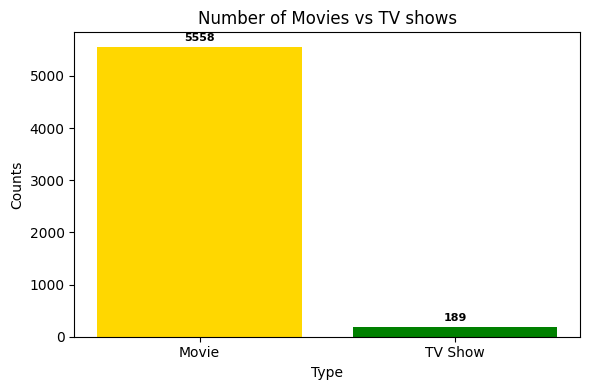

In [3]:
# We want to compare the types of movies in the dataset

import pandas as pd
import matplotlib.pyplot as plt

type_count = df['type'].value_counts()

plt.figure(figsize=(6,4))
bars = plt.bar(type_count.index, type_count.values, color = ['gold','green'])
plt.title('Number of Movies vs TV shows')
plt.xlabel('Type')
plt.ylabel('Counts')

plt.bar_label(bars, label_type='edge', padding=3, fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('movie_vs_tvshow.png')
plt.show()

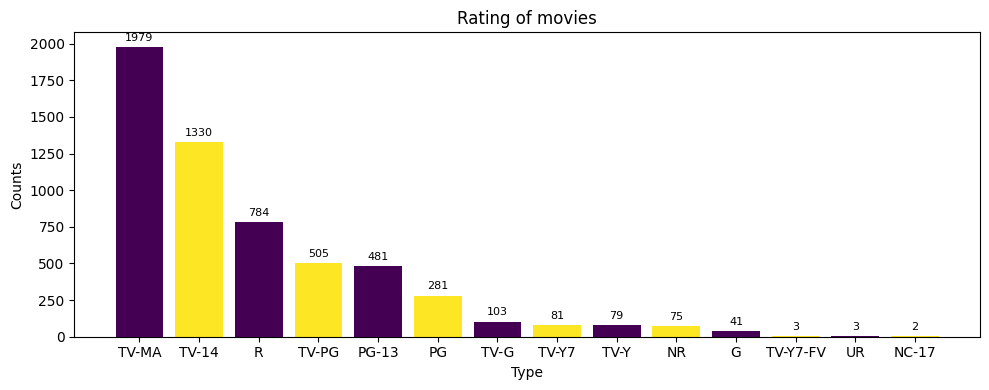

In [4]:
# We want to show the types of rating 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

rating_count = df['rating'].value_counts()

plt.figure(figsize=(10,4))

# using colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(type_count)))

bars = plt.bar(rating_count.index, rating_count.values, color=colors)
plt.title('Rating of movies')
plt.xlabel('Type')
plt.ylabel('Counts')

plt.bar_label(bars, label_type='edge', padding=3, fontsize=8)

plt.tight_layout()
plt.savefig('rating.png')
plt.show()

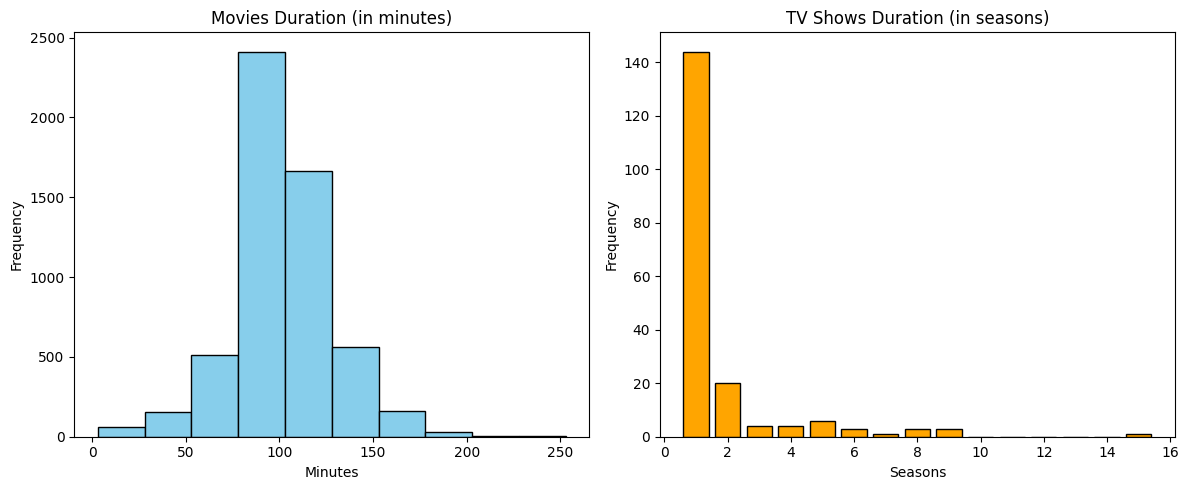

In [5]:
# Movie vs TV show duration (Histogram)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Movie duration (minutes)
df_movies = df[df["type"] == "Movie"].copy()
df_movies["minutes"] = df_movies["duration"].str.replace(" min","").astype(float)

# TV Show duration (seasons)
df_shows = df[df["type"] == "TV Show"].copy()
df_shows["seasons"] = df_shows["duration"].str.replace(" Season","").str.replace("s","").astype(int) # here there are two replacements one is for Season and some is Seasons so we replace Season and s too 

# Plotting
plt.figure(figsize=(12,5))

# Histogram for Movies
plt.subplot(1,2,1)
plt.hist(df_movies["minutes"], bins=10, color="skyblue", edgecolor="black")
plt.title("Movies Duration (in minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")

# Histogram for TV Shows
plt.subplot(1,2,2)
plt.hist(df_shows["seasons"], bins=np.arange(df_shows["seasons"].min(), df_shows["seasons"].max()+2)-0.5,
         color="orange", edgecolor="black", rwidth=0.8)
plt.title("TV Shows Duration (in seasons)")
plt.xlabel("Seasons")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig('movie_vs_tvshow_duration_hist.png')
plt.show()


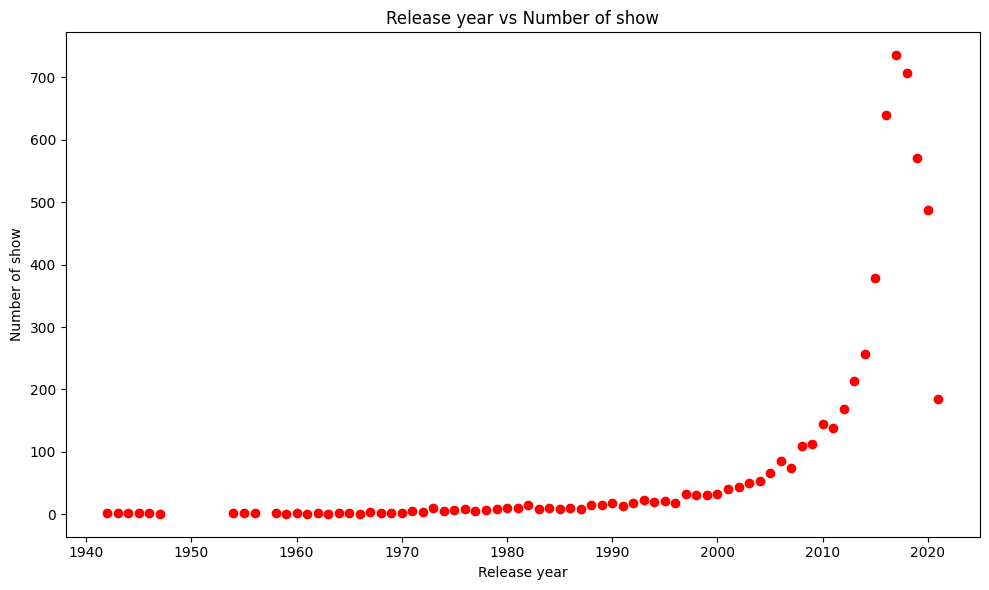

In [6]:
# Release year vs Number of shows 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

release_count = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.scatter(release_count.index, release_count.values, color='red')

plt.title("Release year vs Number of show")
plt.xlabel("Release year")
plt.ylabel("Number of show")

plt.tight_layout()
plt.savefig('Release year vs Number of show.png')
plt.show()



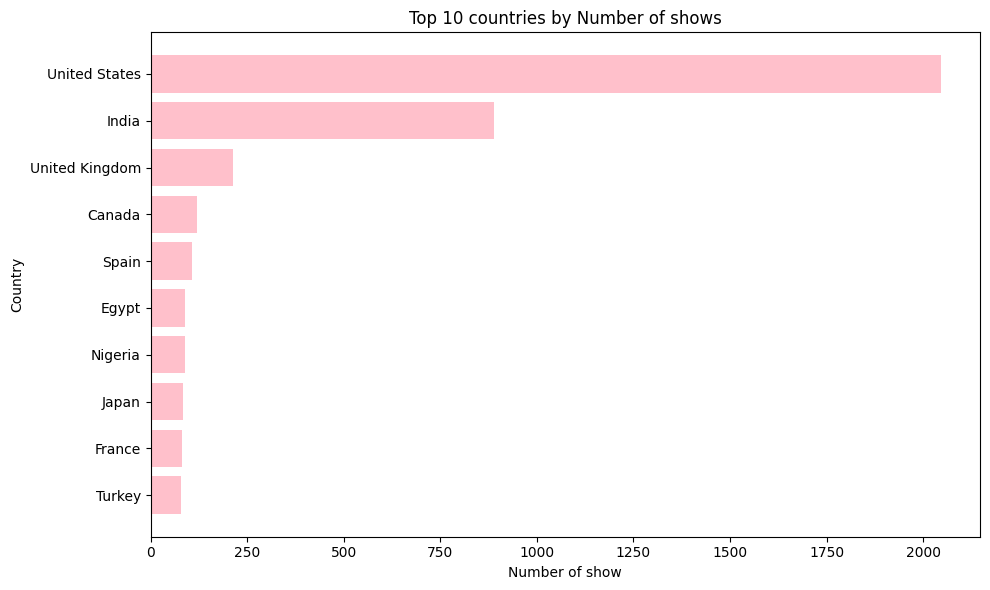

In [7]:
# Top 10 countries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

country_count = df['country'].value_counts().head(10)
# Reverse order so that largest is at the top in barh
country_count = country_count.iloc[::-1]

plt.figure(figsize=(10,6))
plt.barh(country_count.index, country_count.values, color='pink')

plt.title("Top 10 countries by Number of shows")
plt.xlabel("Number of show")
plt.ylabel("Country")

plt.tight_layout()
plt.savefig('Top 10 countries by Number of show.png')
plt.show()

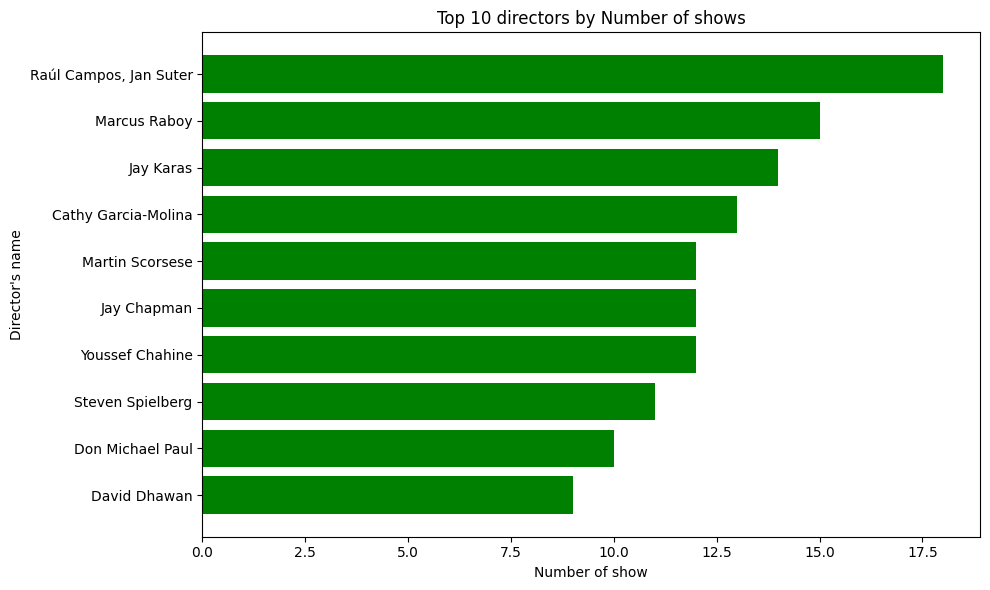

In [8]:
# Top 10 directors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

director_count = df['director'].value_counts().head(10)
# Reverse order so that largest is at the top in barh
director_count = director_count.iloc[::-1]

plt.figure(figsize=(10,6))
plt.barh(director_count.index, director_count.values, color='green')

plt.title("Top 10 directors by Number of shows")
plt.xlabel("Number of show")
plt.ylabel("Director's name")

plt.tight_layout()
plt.savefig('Top 10 directors by Number of show.png')
plt.show()

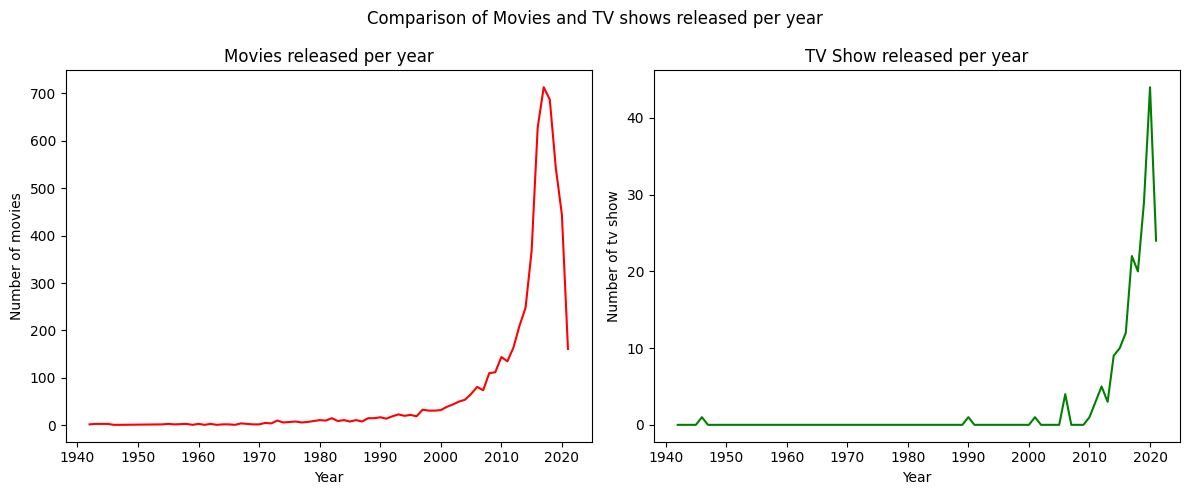

In [9]:
# Comparison of Movies and TV shows released per year

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

content_per_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2,figsize=(12,5))

# first subplot : movies
ax[0].plot(content_per_year.index, content_per_year['Movie'], color="red")
ax[0].set_title('Movies released per year')
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of movies")

# second subplot : tv show
ax[1].plot(content_per_year.index, content_per_year['TV Show'], color="green")
ax[1].set_title('TV Show released per year')
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of tv show")

fig.suptitle('Comparison of Movies and TV shows released per year')

plt.tight_layout()
plt.savefig('Comparison of Movies and TV shows released per year.png')
plt.show()

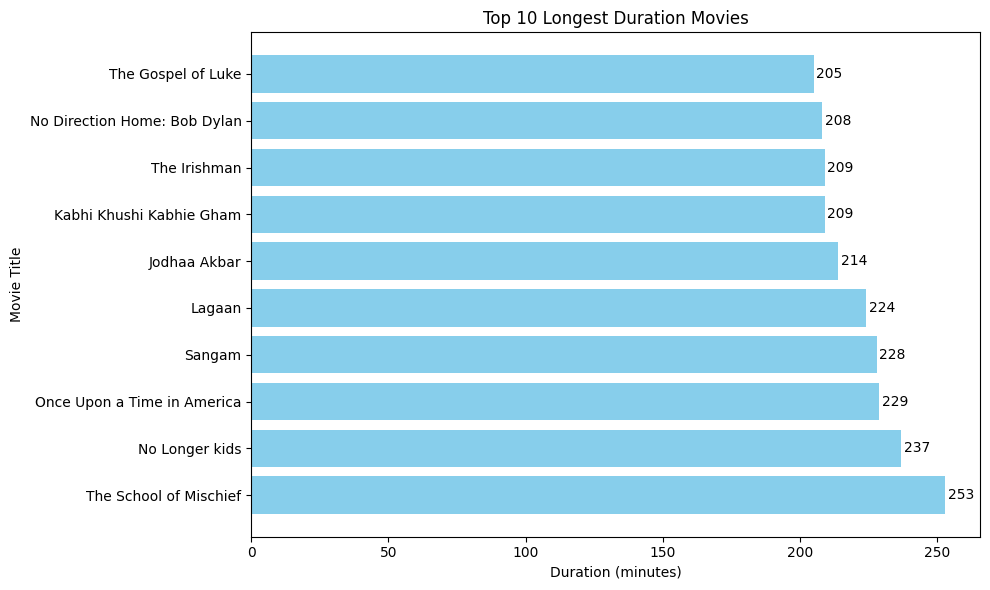

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_movies = df[df['type'] == 'Movie'].copy()

df_movies['minutes'] = df_movies['duration'].str.replace(" min","").astype(float)

# Top 10 longest movies
top10_movies = df_movies.sort_values(by='minutes', ascending=False).head(10)

# Plot
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.barh(top10_movies['title'], top10_movies['minutes'], color='skyblue')

ax.set_title("Top 10 Longest Duration Movies")
ax.set_xlabel("Duration (minutes)")
ax.set_ylabel("Movie Title")

ax.bar_label(bars, fmt='%d', label_type='edge', padding=2)

plt.tight_layout()
plt.show()


🎬 Conclusion & Key Insights

Content Mix: Netflix library is dominated by Movies, but TV Shows are steadily growing, indicating Netflix’s push towards long-form engagement.

Top Producing Countries: United States, India, and United Kingdom contribute the majority of content, highlighting strong regional production hubs.

Release Trend: Most releases happened after 2015, showing Netflix’s aggressive expansion in recent years.

Popular Genres: International Movies, Dramas, and Comedies lead the platform, proving diverse audience demand for global storytelling.

Strategic Insight:

Invest more in regional content production (especially Asia) to capture emerging markets.

Strengthen TV show portfolio to increase binge-watching and retention.

Promote international and diverse genres to appeal to a wider audience base.

✨ Impact: These steps can enhance user engagement, grow subscriber base, and maintain Netflix’s competitive edge.